## 📘 Objective

This notebook addresses a synthetic data generation task.  
first generating an original dataset with known parameters, and then create a new dataset with **similar structure and distribution** — but **without reusing the original sampling parameters**.

The goal is to verify the similarity between the original and synthetic datasets through:
- Statistical comparisons (means, standard deviations, KS tests, chi-squared test)
- Visualizations (box plots and histograms)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp, chisquare

In [2]:
# --- Global Seed ---
np.random.seed(42)  # Consistent seed for reproducibility

## 🧪 Step 1: Original Dataset Generation

Creating the original dataset using known parameters:

- **Category1**: 5 categories with specified probabilities.
- **Value1**: Normal distribution (mean ≈ 10, std ≈ 2).
- **Value2**: Normal distribution (mean ≈ 20, std ≈ 6).

This simulates a small but structured dataset from which we will infer characteristics.


In [3]:
# --- Original Dataset ---
n_samples = 500
orig_probs = [0.2, 0.4, 0.2, 0.1, 0.1]
orig_categories = np.random.choice(["A", "B", "C", "D", "E"], size=n_samples, p=orig_probs)
orig_value1 = np.random.normal(loc=10, scale=2, size=n_samples)
orig_value2 = np.random.normal(loc=20, scale=6, size=n_samples)

original_df = pd.DataFrame({
    "Category1": orig_categories,
    "Value1": orig_value1,
    "Value2": orig_value2
})

## 🧪 Step 2: Synthetic Dataset Generation (Different Parameters)

Generated a new dataset with different parameters:

- Adjusted category probabilities
- Value1: Normal distribution (mean = 9.8, std = 2.1)
- Value2: Normal distribution (mean = 21.0, std = 6.5)

These values are **intentionally distant** from the original parameters but still aim to produce a **visually and statistically similar** dataset.


In [4]:
# --- Synthetic Dataset ---
n_samples = 1500
synthetic_categories = np.random.choice(["A", "B", "C", "D", "E"], size=n_samples, p=[0.22, 0.38, 0.2, 0.1, 0.1])
synthetic_value1 = np.random.normal(loc=9.8, scale=2.1, size=n_samples)
synthetic_value2 = np.random.normal(loc=21, scale=6.5, size=n_samples)

synthetic_df = pd.DataFrame({
    "Category1": synthetic_categories,
    "Value1": synthetic_value1,
    "Value2": synthetic_value2
})


In [5]:
# --- Statistical Comparison ---
print("\n--- Means and Std Dev Differences ---")
mean_diff_v1 = synthetic_df['Value1'].mean() - original_df['Value1'].mean()
std_diff_v1 = synthetic_df['Value1'].std() - original_df['Value1'].std()
mean_diff_v2 = synthetic_df['Value2'].mean() - original_df['Value2'].mean()
std_diff_v2 = synthetic_df['Value2'].std() - original_df['Value2'].std()
print(f"Value1 Mean Diff: {mean_diff_v1:.2f}, Std Diff: {std_diff_v1:.2f}")
print(f"Value2 Mean Diff: {mean_diff_v2:.2f}, Std Diff: {std_diff_v2:.2f}")


--- Means and Std Dev Differences ---
Value1 Mean Diff: -0.25, Std Diff: 0.11
Value2 Mean Diff: 0.33, Std Diff: 0.44


## 📈 Step 3: Statistical Similarity Tests

The following tests are performed:
- **Kolmogorov–Smirnov (KS) test** on `Value1` and `Value2` to compare distribution shapes.
- **Chi-squared test** on `Category1` to compare categorical proportions.

A **p-value > 0.05** generally indicates similarity between the original and synthetic distributions.


🧪 Chi-Squared Test (Category1)
What it checks: Whether the categorical distribution of Category1 in the synthetic data is similar to the original.

Interpretation:

A p-value > 0.05 means there is no statistically significant difference — i.e., distributions are similar.

This validates that the category probabilities are reasonably preserved.

In [6]:
from scipy.stats import chi2_contingency

# Count frequencies for each category in original and synthetic
original_counts = original_df['Category1'].value_counts().sort_index()
synthetic_counts = synthetic_df['Category1'].value_counts().sort_index()

# Build contingency table
contingency_df = pd.DataFrame({
    "Original": original_counts,
    "Synthetic": synthetic_counts
})

# Perform chi-squared test of homogeneity
chi2, p, dof, expected = chi2_contingency(contingency_df.T)

print("\n--- Chi-Squared Test of Homogeneity (Category1) ---")
print(f"Chi² = {chi2:.2f}, p = {p:.4f}")
if p < 0.05:
    print("→ ❌ Distributions are significantly different.")
else:
    print("→ ✅ Distributions are not significantly different.")



--- Chi-Squared Test of Homogeneity (Category1) ---
Chi² = 2.16, p = 0.7062
→ ✅ Distributions are not significantly different.


📈 Kolmogorov–Smirnov Test (Value1 & Value2)
What it checks: Whether the distributions of Value1 and Value2 are statistically similar.

Interpretation:

p-value > 0.05 indicates the two distributions are not significantly different.

This means the synthetic continuous data mirrors the original well, without being an exact replica.

In [7]:
# --- Kolmogorov-Smirnov Test ---
ks_v1 = ks_2samp(original_df['Value1'], synthetic_df['Value1'])
ks_v2 = ks_2samp(original_df['Value2'], synthetic_df['Value2'])
print("\n--- Kolmogorov-Smirnov Test ---")
print(f"Value1: D={ks_v1.statistic:.3f}, p-value={ks_v1.pvalue:.4f}")
print("→ Different distributions" if ks_v1.pvalue < 0.05 else "→ Similar distributions")
print(f"Value2: D={ks_v2.statistic:.3f}, p-value={ks_v2.pvalue:.4f}")
print("→ Different distributions" if ks_v2.pvalue < 0.05 else "→ Similar distributions")


--- Kolmogorov-Smirnov Test ---
Value1: D=0.063, p-value=0.1030
→ Similar distributions
Value2: D=0.059, p-value=0.1398
→ Similar distributions


## 📊 Step 4: Visual Comparison

Used box plots and histograms to compare the distributions of `Value1` and `Value2` in both original and synthetic datasets.

These visuals help to intuitively assess distributional overlap and potential shifts.


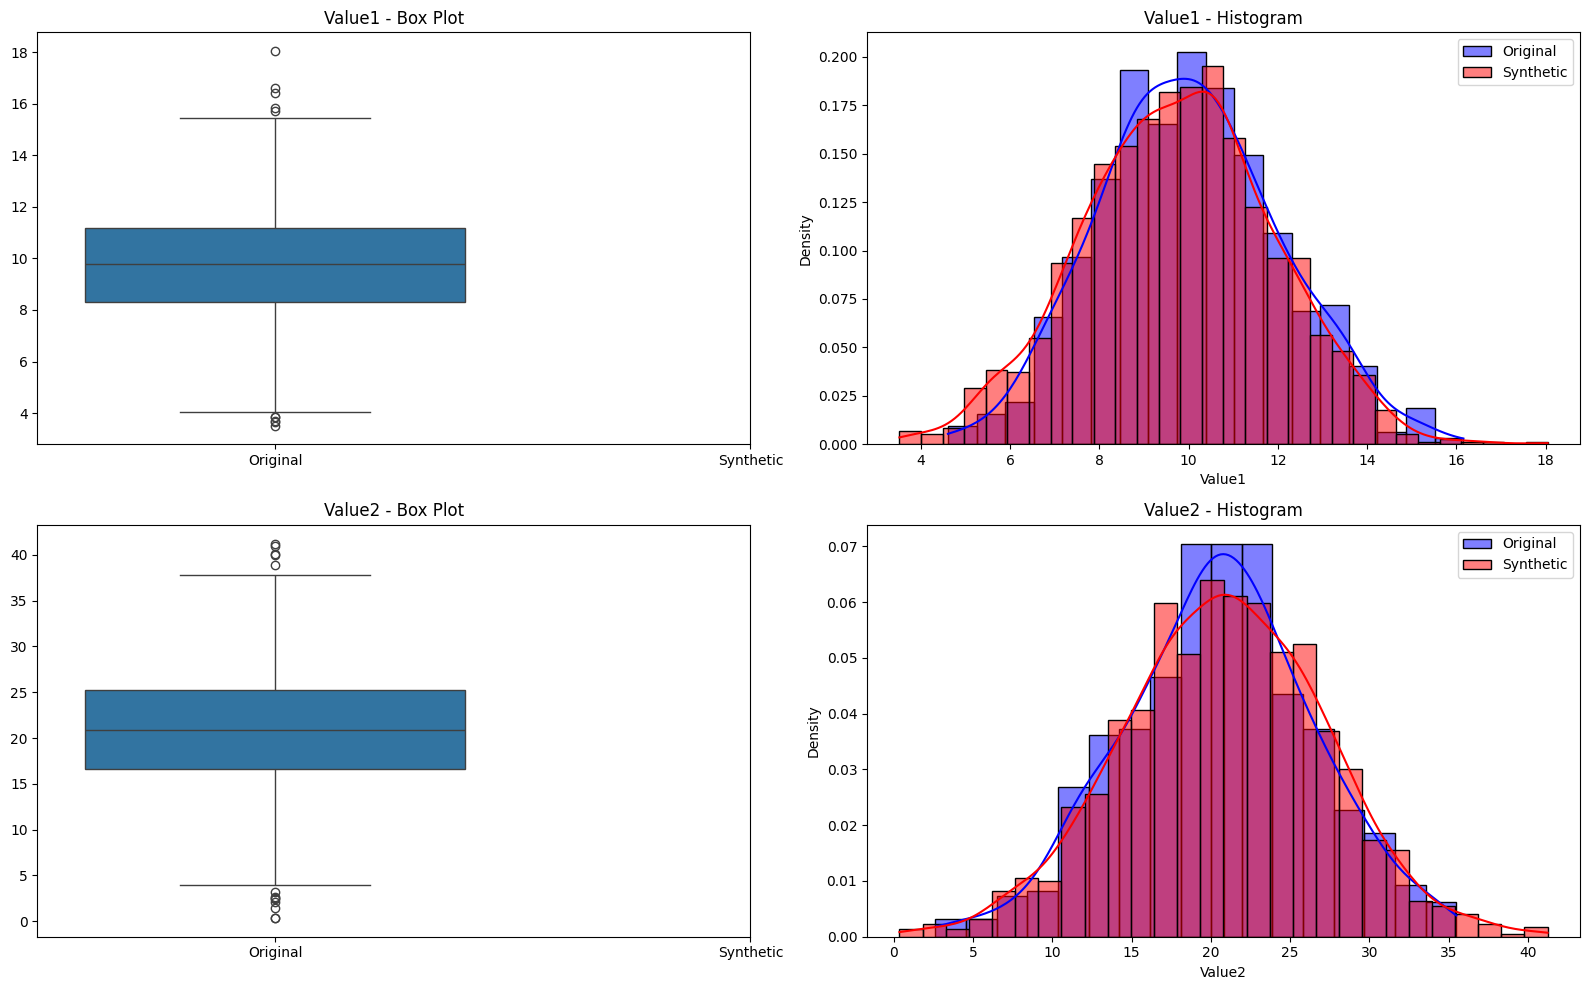

In [8]:
# --- Box Plot + Histogram Comparison ---
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
sns.boxplot(data=[original_df['Value1'], synthetic_df['Value1']])
plt.xticks([0, 1], ['Original', 'Synthetic'])
plt.title("Value1 - Box Plot")

plt.subplot(2, 2, 2)
sns.histplot(original_df['Value1'], color='blue', kde=True, label='Original', stat="density")
sns.histplot(synthetic_df['Value1'], color='red', kde=True, label='Synthetic', stat="density")
plt.legend()
plt.title("Value1 - Histogram")

plt.subplot(2, 2, 3)
sns.boxplot(data=[original_df['Value2'], synthetic_df['Value2']])
plt.xticks([0, 1], ['Original', 'Synthetic'])
plt.title("Value2 - Box Plot")

plt.subplot(2, 2, 4)
sns.histplot(original_df['Value2'], color='blue', kde=True, label='Original', stat="density")
sns.histplot(synthetic_df['Value2'], color='red', kde=True, label='Synthetic', stat="density")
plt.legend()
plt.title("Value2 - Histogram")

plt.tight_layout()
plt.show()

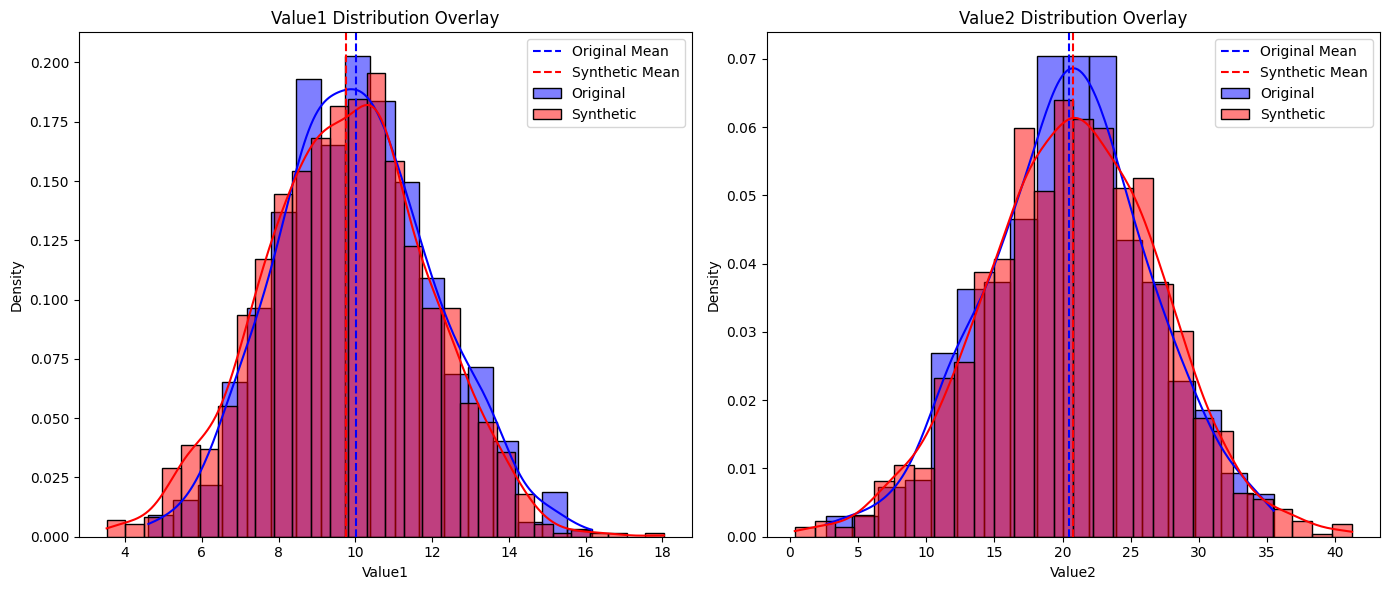

In [9]:
# Overlayed Histogram with Mean Lines
plt.figure(figsize=(14, 6))

for i, column in enumerate(["Value1", "Value2"]):
    plt.subplot(1, 2, i + 1)
    sns.histplot(original_df[column], color="blue", label="Original", kde=True, stat="density", alpha=0.5)
    sns.histplot(synthetic_df[column], color="red", label="Synthetic", kde=True, stat="density", alpha=0.5)

    plt.axvline(original_df[column].mean(), color='blue', linestyle='--', label='Original Mean')
    plt.axvline(synthetic_df[column].mean(), color='red', linestyle='--', label='Synthetic Mean')

    plt.title(f"{column} Distribution Overlay")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-10-915dbe320856>:6: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.violinplot(data=[original_df[column], synthetic_df[column]], palette=["blue", "red"])
<ipython-input-10-915dbe320856>:6: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.violinplot(data=[original_df[column], synthetic_df[column]], palette=["blue", "red"])


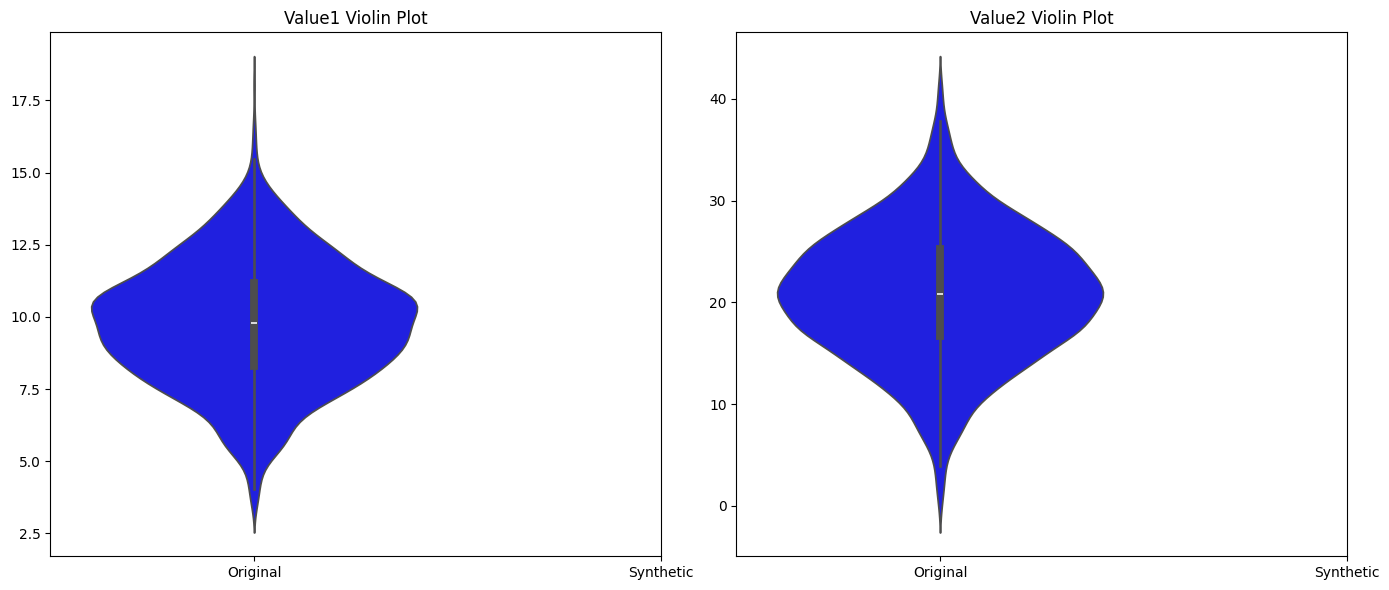

In [10]:
# Violin Plots for Distribution Shape Comparison
plt.figure(figsize=(14, 6))

for i, column in enumerate(["Value1", "Value2"]):
    plt.subplot(1, 2, i + 1)
    sns.violinplot(data=[original_df[column], synthetic_df[column]], palette=["blue", "red"])
    plt.xticks([0, 1], ["Original", "Synthetic"])
    plt.title(f"{column} Violin Plot")

plt.tight_layout()
plt.show()


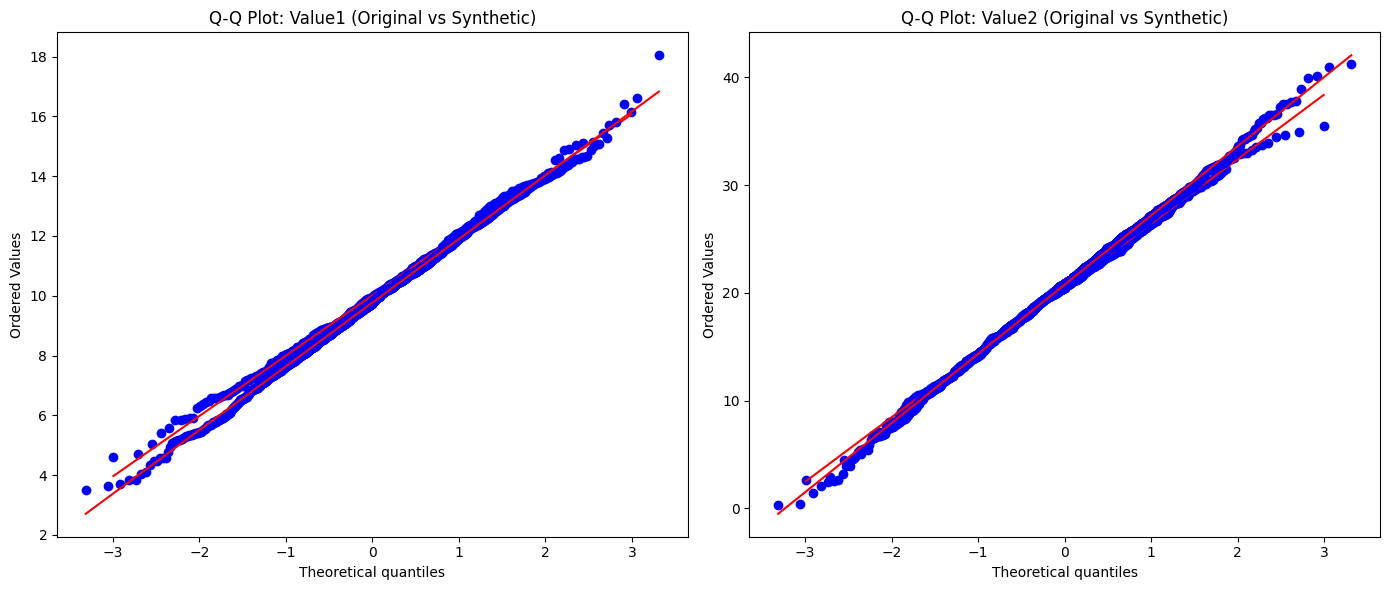

In [11]:
import scipy.stats as stats

# Q-Q Plot
plt.figure(figsize=(14, 6))

for i, column in enumerate(["Value1", "Value2"]):
    plt.subplot(1, 2, i + 1)
    stats.probplot(original_df[column], dist="norm", plot=plt)
    stats.probplot(synthetic_df[column], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot: {column} (Original vs Synthetic)")

plt.tight_layout()
plt.show()


In [12]:
# --- Save Data ---
original_df.to_csv("original_dataset.csv", sep=';', index=False)
synthetic_df.to_csv("synthetic_dataset.csv", sep=';', index=False)
print("✅ Refined datasets saved with semicolon separators.")

✅ Refined datasets saved with semicolon separators.
